<a href="https://colab.research.google.com/github/manasik29/Regularisation_model/blob/main/Regularisation_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
#Loading datasets
boston_datasets = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [21]:
boston_pd = pd.DataFrame(boston_datasets.data)
boston_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
boston_datasets.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
boston_datasets.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [24]:
boston_pd.columns = boston_datasets.feature_names
boston_pd_target = np.asarray(boston_datasets.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

In [25]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
x = boston_pd.iloc[:,:-1]
y = boston_pd.iloc[:,-1]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [29]:
#Apply Linear Regression 
lreg = LinearRegression()
lreg.fit(x_train, y_train)

#get pred values
lreg_ypred = lreg.predict(x_test)

#get mean squared erroe
mean_squared_error = np.mean((lreg_ypred - y_test)**2)
print("Mean Squared Error of our model is: ", mean_squared_error)

#get coef of each columns
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate']= pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean Squared Error of our model is:  43.50581384619031
    Columns  Coefficient Estimate
0      CRIM             -0.122779
1        ZN              0.036118
2     INDUS              0.018250
3      CHAS              2.218426
4       NOX            -17.539461
5        RM              5.287974
6       AGE             -0.020659
7       DIS             -1.502443
8       RAD              0.214349
9       TAX             -0.010915
10  PTRATIO             -0.975225
11        B              0.008340
12    LSTAT             -0.360660


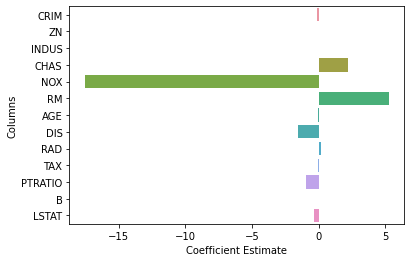

In [30]:
import seaborn as sns

sns.barplot(x= 'Coefficient Estimate', y = 'Columns' , data= lreg_coefficient)

**Ridge Model**

In [31]:
#Apply Ridge Regression 
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)

#get pred values
ridge_ypred = ridge.predict(x_test)

#get mean squared erroe
mean_squared_error_ridge = np.mean((ridge_ypred - y_test)**2)
print("Mean Squared Error of our model is: ", mean_squared_error_ridge)

#get coef of each columns
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns
ridge_coefficient['Coefficient Estimate']= pd.Series(ridge.coef_)
print(ridge_coefficient)

Mean Squared Error of our model is:  43.76358874431215
    Columns  Coefficient Estimate
0      CRIM             -0.117968
1        ZN              0.036546
2     INDUS             -0.012731
3      CHAS              2.061694
4       NOX             -9.330959
5        RM              5.350031
6       AGE             -0.027989
7       DIS             -1.364913
8       RAD              0.203460
9       TAX             -0.012102
10  PTRATIO             -0.890003
11        B              0.008970
12    LSTAT             -0.368091


**Lasso Model**

In [34]:
#Apply Ridge Regression 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2)
lasso.fit(x_train, y_train)

#get pred values
lasso_ypred = lasso.predict(x_test)

#get mean squared erroe
mean_squared_error_lasso = np.mean((lasso_ypred - y_test)**2)
print("Mean Squared Error of our model is: ", mean_squared_error_lasso)

#get coef of each columns
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = x_train.columns
lasso_coefficient['Coefficient Estimate']= pd.Series(lasso.coef_)
print(lasso_coefficient)

Mean Squared Error of our model is:  43.01722336127703
    Columns  Coefficient Estimate
0      CRIM             -0.109448
1        ZN              0.038820
2     INDUS             -0.025444
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              4.824939
6       AGE             -0.025375
7       DIS             -1.098282
8       RAD              0.217184
9       TAX             -0.014928
10  PTRATIO             -0.810226
11        B              0.009514
12    LSTAT             -0.431148


**ElasticNet Model**

In [42]:
#Apply Ridge Regression 
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.04, l1_ratio=0.5)
en.fit(x_train, y_train)

#get pred values
en_ypred = en.predict(x_test)

#get mean squared erroe
mean_squared_error_en = np.mean((en_ypred - y_test)**2)
print("Mean Squared Error of our model is: ", mean_squared_error_en)

#get coef of each columns
en_coefficient = pd.DataFrame()
en_coefficient["Columns"] = x_train.columns
en_coefficient['Coefficient Estimate']= pd.Series(en.coef_)
print(en_coefficient)

Mean Squared Error of our model is:  43.12521077175163
    Columns  Coefficient Estimate
0      CRIM             -0.114462
1        ZN              0.039398
2     INDUS             -0.044389
3      CHAS              1.383758
4       NOX             -1.424680
5        RM              4.994400
6       AGE             -0.030647
7       DIS             -1.237440
8       RAD              0.211040
9       TAX             -0.013897
10  PTRATIO             -0.826650
11        B              0.009386
12    LSTAT             -0.408147
